In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import sparse
import matplotlib.pyplot as plt
import scipy as sp
import time
from scipy.sparse import hstack
import time
import os
data_paths = {}
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        data_paths[filename] = os.path.join(dirname, filename)
        print(os.path.join(dirname, filename))

/kaggle/input/patient-switch-featurepipeline/test_feature_names.csv
/kaggle/input/patient-switch-featurepipeline/__notebook__.ipynb
/kaggle/input/patient-switch-featurepipeline/train_fitness_values.csv
/kaggle/input/patient-switch-featurepipeline/train_features.npz
/kaggle/input/patient-switch-featurepipeline/__results__.html
/kaggle/input/patient-switch-featurepipeline/train_feature_names.csv
/kaggle/input/patient-switch-featurepipeline/__output__.json
/kaggle/input/patient-switch-featurepipeline/test_features.npz
/kaggle/input/patient-switch-featurepipeline/custom.css
/kaggle/input/drug-switch-preprocessing/train.parquet
/kaggle/input/drug-switch-preprocessing/__notebook__.ipynb
/kaggle/input/drug-switch-preprocessing/train_labels.parquet
/kaggle/input/drug-switch-preprocessing/test.parquet
/kaggle/input/drug-switch-preprocessing/__results__.html
/kaggle/input/drug-switch-preprocessing/__output__.json
/kaggle/input/drug-switch-preprocessing/custom.css


In [2]:
train_df = pd.read_parquet(data_paths['train.parquet'])
print('train data:', train_df.shape, train_df.columns)

target_df = pd.read_parquet(data_paths['train_labels.parquet'])
print('train labels', target_df.shape, target_df.columns)

# get +ve & -ve indices
one_idx = target_df[target_df['outcome_flag'] == 1]['id'].index.tolist()
zero_idx = target_df[target_df['outcome_flag'] == 0]['id'].index.tolist()

train data: (14446880, 7) Index(['patient_id', 'event_name', 'event_time', 'specialty', 'plan_type',
       'patient_payment', 'id'],
      dtype='object')
train labels (16683, 3) Index(['patient_id', 'outcome_flag', 'id'], dtype='object')


In [3]:
def save_data(data, path):
    return sparse.save_npz(path, data)

def load_data(path):
    return sparse.load_npz(path).tocsr()

In [4]:
train_feat = load_data(data_paths['train_features.npz'])
train_feat.shape

(16683, 41525)

In [5]:
rcf = 755
fqf = 27180

In [6]:
train_df['event_id'] = train_df['event_name'].apply(lambda x: int(x.split('_')[1]))
train_df['specialty_id'] = train_df['specialty'].apply(lambda x: int(x.split('_')[1]))
train_df['plan_id'] = train_df['plan_type'].apply(lambda x: int(x.split('_')[1]))

In [7]:
pos_df = train_df[train_df['id'].isin(one_idx)]
neg_df = train_df[train_df['id'].isin(zero_idx)]
pos_df.shape, neg_df.shape

((1875755, 10), (10464247, 10))

### payment feature

1. event_id v/s patient_payment

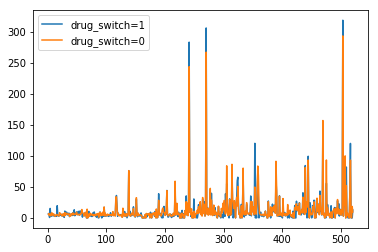

In [8]:
pos_ep = pos_df.groupby(['event_id'])['patient_payment'].mean().to_frame()
neg_ep = neg_df.groupby(['event_id'])['patient_payment'].mean().to_frame()
plt.plot(pos_ep.index, pos_ep['patient_payment'], label='drug_switch=1')
plt.plot(neg_ep.index, neg_ep['patient_payment'], label='drug_switch=0')
plt.legend()

2. specialty_id v/s patient_payment

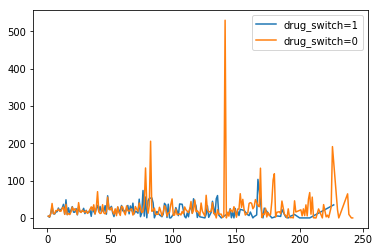

In [9]:
pos_ep = pos_df.groupby(['specialty_id'])['patient_payment'].mean().to_frame()
neg_ep = neg_df.groupby(['specialty_id'])['patient_payment'].mean().to_frame()
plt.plot(pos_ep.index, pos_ep['patient_payment'], label='drug_switch=1')
plt.plot(neg_ep.index, neg_ep['patient_payment'], label='drug_switch=0')
plt.legend()

3. plan_id v/s patient_payment

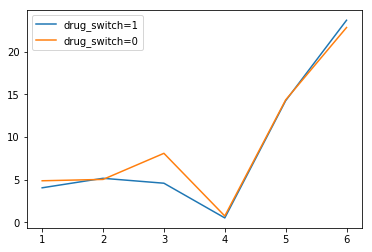

In [10]:
pos_ep = pos_df.groupby(['plan_id'])['patient_payment'].mean().to_frame()
neg_ep = neg_df.groupby(['plan_id'])['patient_payment'].mean().to_frame()
plt.plot(pos_ep.index, pos_ep['patient_payment'], label='drug_switch=1')
plt.plot(neg_ep.index, neg_ep['patient_payment'], label='drug_switch=0')
plt.legend()

### event_time features

1. event_id v/s event_time

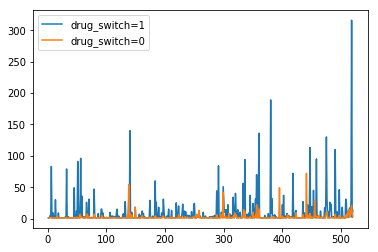

In [11]:
pos_ep = pos_df.groupby(['event_id'])['event_time'].min().to_frame()
neg_ep = neg_df.groupby(['event_id'])['event_time'].min().to_frame()
plt.plot(pos_ep.index, pos_ep['event_time'], label='drug_switch=1')
plt.plot(neg_ep.index, neg_ep['event_time'], label='drug_switch=0')
plt.legend()

2. specialty_id v/s event_time

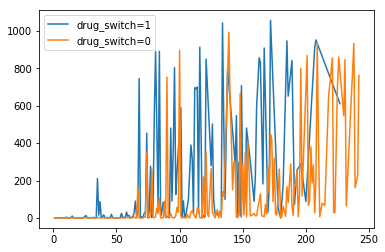

In [12]:
pos_ep = pos_df.groupby(['specialty_id'])['event_time'].min().to_frame()
neg_ep = neg_df.groupby(['specialty_id'])['event_time'].min().to_frame()
plt.plot(pos_ep.index, pos_ep['event_time'], label='drug_switch=1')
plt.plot(neg_ep.index, neg_ep['event_time'], label='drug_switch=0')
plt.legend()

3. plan_id v/s event_time

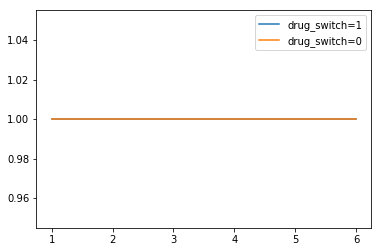

In [13]:
pos_ep = pos_df.groupby(['plan_id'])['event_time'].min().to_frame()
neg_ep = neg_df.groupby(['plan_id'])['event_time'].min().to_frame()
plt.plot(pos_ep.index, pos_ep['event_time'], label='drug_switch=1')
plt.plot(neg_ep.index, neg_ep['event_time'], label='drug_switch=0')
plt.legend()